In [3]:
from datetime import datetime, timedelta
from lib.polygon_util import get_price_history

to_date = datetime.today()
from_date = to_date - timedelta(days=30)
results = get_price_history('TSLA', from_date=from_date, to_date=to_date)
data = [r for r in results['results']]
print([datetime.fromtimestamp(r['t'] / 1000).strftime('%Y-%m-%d') for r in data])

['2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21']


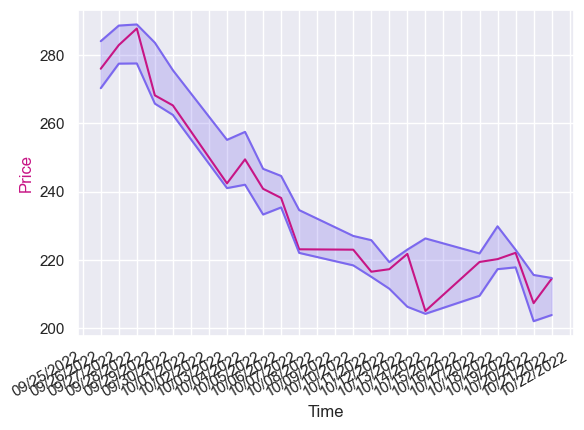

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

pf = pd.DataFrame(data)

pf['spr'] = pf['h'] - pf['l']
pf['t'] = pf['t'].apply(lambda x: datetime.fromtimestamp(x / 1000))
pf['date'] = pf['t']
pf.set_index('date', inplace=True)

fig, ax1 = plt.subplots() 
ax1.set_xlabel('Time') 
ax1.set_ylabel('Price', color = 'mediumvioletred')
ax1.plot(pf['t'], pf['c'], color='mediumvioletred')

# ax2 = ax1.twinx()
# ax2.set_ylabel('Spread', color = 'blue') 
ax1.plot(pf['t'], pf['h'], color='mediumslateblue')
ax1.plot(pf['t'], pf['l'], color='mediumslateblue')
ax1.fill_between(
    pf['t'], pf['l'], pf['h'], where=(pf['l'] < pf['h']), 
    interpolate=True, color="mediumslateblue", alpha=0.25, 
    label="Spread"
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator()) 
plt.gcf().autofmt_xdate()
plt.show()

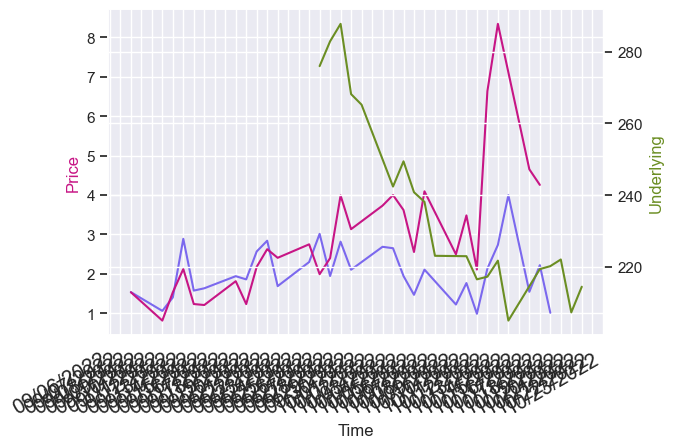

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from lib.models.aggregrates import Aggregates
TICKER = 'TSLA'
lookback = 14
agg = Aggregates()
# calls = agg.getSet(where=f'ticker LIKE "O:{TICKER}22%C%"', offset=0, limit=11000, order='asc', order_by='ticker')
# puts = agg.getSet(where=f'ticker LIKE "O:{TICKER}22%P%"', offset=0, limit=11000, order='asc', order_by='ticker')
calls = agg.getResult(f"SELECT date, sum(volume) as v, avg(vw) as vw, avg(high - low) as spread, avg(close) as close, sum(number) FROM aggregates where ticker LIKE 'O:{TICKER}22%C%' GROUP BY date ORDER by date asc")
puts = agg.getResult(f"SELECT date, sum(volume) as v, avg(vw) as vw, avg(high - low) as spread, avg(close) as close, sum(number) FROM aggregates where ticker LIKE 'O:{TICKER}22%P%' GROUP BY date ORDER by date asc")
df_calls = pd.DataFrame(calls)
df_calls['date'] = df_calls['date'].apply(lambda x: datetime.strptime(x.strftime('%Y-%m-%d'), '%Y-%m-%d'))
df_calls.set_index('date', inplace=True)
df_calls['type'] = 'call'
df_puts = pd.DataFrame(puts)
df_puts['date'] = df_puts['date'].apply(lambda x: datetime.strptime(x.strftime('%Y-%m-%d'), '%Y-%m-%d'))
df_puts.set_index('date', inplace=True)
df_puts['type'] = 'put'
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax2.set_ylabel('Underlying', color = 'olivedrab') 
ax2.plot(pf.index, pf['c'], color='olivedrab')

ax1.set_xlabel('Time') 
ax1.set_ylabel('Price', color = 'mediumvioletred')
ax1.plot(df_calls.index, df_calls['spread'], color='mediumslateblue')
ax1.plot(df_puts.index, df_puts['spread'], color='mediumvioletred')
ax1.tick_params(axis='x',labelsize=10,rotation=90)



plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator()) 
plt.gcf().autofmt_xdate()
plt.show()
